
#### MICROSOFT STUDIO - Unlocking the Tri-fecta of Triumph

By Cynthia Jepkogei

### Overview of Microsoft's Potential Entry into Original Video Content

This project seeks to inform Microsoft Studios' decision to enter the original video content market, currently dominated by various large companies. Through an analysis of movie data from online databases, we have identified three key areas where Microsoft can leverage its strengths:
# 1. Business Partnerships:
Partnering with established studios or streaming platforms can provide Microsoft with immediate access to expertise, resources, and distribution channels. This can mitigate the risks associated with entering a saturated market and overcome Microsoft's lack of experience in content production and streaming.
# 2. Content Selection:
Utilizing descriptive statistics and exploratory data analysis, we can identify film genres and types currently performing well at the box office. This data-driven approach can guide Microsoft Studios in selecting the most commercially viable content for production.
# 3. Personnel/Hiring:
Building a strong team with experienced professionals in film production, content creation, and streaming platform management is crucial. This involves actively recruiting industry veterans and subject-matter experts (directors, writers, etc.) to address Microsoft's current lack of domain-specific knowledge.
### Addressing the Business Problem.

1. Saturated Market:
By partnering with established players and focusing on data-driven content selection, Microsoft can navigate the crowded market and compete effectively.
2. Lack of Experience:
Strategic partnerships can bridge the gap in experience and provide valuable industry insights. Additionally, recruiting experienced personnel will bolster Microsoft's internal expertise.
3. Lack of Subject Matter Experts:
Active recruitment of industry professionals can address the lack of subject-matter experts and equip Microsoft Studios with the necessary knowledge and skills to succeed in the competitive video content landscape.

### Data Sources and Integration

The project utilizes data from five reputable online databases:
1. IMDB and Box Office Mojo by IMDb
2. Rotten Tomatoes
3. The Movie Database
4. The Numbers
These diverse datasets provide a comprehensive picture of the film industry and enable robust analysis. Data integration was achieved through unique identifiers for movies and crew, alongside movie name matching, ensuring accurate and reliable information.
By addressing the identified business problems and leveraging the insights from the data analysis, Microsoft Studios can increase its chances of success when entering the original video content market. the original video content market.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline


## 1. Read the Dataframes

In [254]:
# Read the CSV file into a Pandas DataFrame
# 1. Bom movies gross
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')


In [255]:
# Get the DataFrame shape
print(bom_movie_gross.shape)

# Get the DataFrame columns
print(bom_movie_gross.columns)

# Get the DataFrame dtypes
print(bom_movie_gross.dtypes)

(3387, 5)
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [256]:
# 2. Connect to the SQLite database
conn = sqlite3.connect('im.db/im.db')

# Query to get the list of tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query
tables = pd.read_sql_query(tables_query, conn)

# Display the list of tables
print("Tables in the database:")
print(tables)


Tables in the database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [257]:
sql_query = "SELECT * FROM movie_basics;"

# Use pandas to read the data into a DataFrame
imdb = pd.read_sql_query(sql_query, conn)

# Display the first few rows of the DataFrame
print(imdb.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [258]:
#4. Movie Info
# Path to the gzipped TSV file
file_path = 'rt.movie_info.tsv.gz'

# Use pandas to read the data into a DataFrame
rt_movie_info = pd.read_csv(file_path, sep='\t', compression='gzip')

# Display the first few rows of the DataFrame
print(rt_movie_info.head())

   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2          

In [259]:
# Count the number of movies for each director
director_counts = rt_movie_info['director'].value_counts()

# Display the directors and their counts
print(director_counts)


director
Steven Spielberg      10
Clint Eastwood         8
William Friedkin       4
Curtis Hanson          4
William Beaudine       4
                      ..
Evans Butterworth      1
Jeannot Szwarc         1
Maroun Bagdadi         1
James Hogan            1
David Mickey Evans     1
Name: count, Length: 1125, dtype: int64


In [260]:
# 5. Reviews
# Path to the gzipped TSV file
file_path = 'rt.reviews.tsv.gz'

# Use pandas to read the data into a DataFrame
rt_reviews = pd.read_csv(file_path, sep='\t', compression='gzip', encoding='latin1')

# Display the first few rows of the DataFrame
print(rt_reviews.head())

   id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017  


In [261]:
#3. tmdb 
# Path to the gzipped CSV file
file_path = 'tmdb.movies.csv.gz'

# Use pandas to read the data into a DataFrame
tmdb_movies = pd.read_csv(file_path, compression='gzip')

# Display the first few rows of the DataFrame
print(tmdb_movies.head())

   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1           

In [262]:
# 5. Movie budgets
# Path to the gzipped CSV file
file_path = 'tn.movie_budgets.csv.gz'

# Use pandas to read the data into a DataFrame
tn_movie_budgets = pd.read_csv(file_path, compression='gzip')

# Display the first few rows of the DataFrame
print(tn_movie_budgets.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


In [263]:
# Perform a join on the 'id' column
joined_rt = pd.merge(rt_movie_info, rt_reviews, on='id', how='left', suffixes=('_guidelines', '_critical'))

# Drop rows with missing values in the 'runtime' column
joined_rt = joined_rt.dropna(subset=['runtime'])

# Map 'fresh' column to a new 'freshnum' column
joined_rt['freshnum'] = joined_rt['fresh'].map({'fresh': 1, 'rotten': 0})

# Display the resulting DataFrame
print(joined_rt.head())

   id                                           synopsis rating_guidelines  \
0   1  This gritty, fast-paced, and innovative police...                 R   
1   3  New York City, not-too-distant-future: Eric Pa...                 R   
2   3  New York City, not-too-distant-future: Eric Pa...                 R   
3   3  New York City, not-too-distant-future: Eric Pa...                 R   
4   3  New York City, not-too-distant-future: Eric Pa...                 R   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Science Fiction and Fantasy  David Cronenberg   
3    Drama|Science Fiction and Fantasy  David Cronenberg   
4    Drama|Science Fiction and Fantasy  David Cronenberg   

                         writer  theater_date      dvd_date currency  \
0                Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1  David Cronenberg|Don De

## 2. Data Cleaning 

In [264]:
# 1. Remove Duplicate Rows
bom_movie_gross = bom_movie_gross.drop_duplicates()
rt_movie_info = rt_movie_info.drop_duplicates()
rt_reviews = rt_reviews.drop_duplicates()
tmdb_movies = tmdb_movies.drop_duplicates()
tn_movie_budgets = tn_movie_budgets.drop_duplicates()

In [265]:
# 2. Handle Missing Values
bom_movie_gross = bom_movie_gross.dropna()
rt_movie_info = rt_movie_info.dropna()
rt_reviews = rt_reviews.dropna()
tmdb_movies = tmdb_movies.dropna()
tn_movie_budgets = tn_movie_budgets.dropna()

In [266]:
# 3. Convert Numeric Columns
# Check the data types of the columns in tn_movie_budgets
print(tn_movie_budgets.dtypes)
# Convert only if the column is of string type
for column in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    if tn_movie_budgets[column].dtype == 'object':
        tn_movie_budgets[column] = pd.to_numeric(tn_movie_budgets[column].str.replace(',', ''), errors='coerce')

# Verify the changes
print(tn_movie_budgets.head())



id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0                NaN             NaN              NaN  
1                NaN             NaN              NaN  
2                NaN             NaN              NaN  
3                NaN             NaN              NaN  
4                NaN             NaN              NaN  


In [267]:
# 4. Convert Numeric Columns
# Check the data types of the columns in tn_movie_budgets
print(tn_movie_budgets.dtypes)
# Assuming 'production_budget', 'domestic_gross', and 'worldwide_gross' are strings
# Convert only if the column is of string type
for column in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    if tn_movie_budgets[column].dtype == 'object':
        tn_movie_budgets[column] = pd.to_numeric(tn_movie_budgets[column].str.replace(',', ''), errors='coerce')

# Verify the changes
print(tn_movie_budgets.head())


id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0                NaN             NaN              NaN  
1                NaN             NaN              NaN  
2                NaN             NaN              NaN  
3                NaN             NaN              NaN  
4                NaN             NaN              NaN  


In [268]:
# Check the columns in rt_movie_info
print(rt_movie_info.columns)

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [269]:
# 5. Remove Unwanted Columns
# KeepING specific columns in each dataframe
rt_movie_info = rt_movie_info[['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio']]

## Cleaning Studio Data

In [270]:
# 6. Cleaning Studio Data
# Check for missing values
print(rt_movie_info['studio'].isnull().sum())

# Option 1: Remove rows with missing values
rt_movie_info = rt_movie_info.dropna(subset=['studio'])


0


From the output we find that the studio data has no duplicates

In [271]:
#  Investigating the studio data 
#Print unique values in the 'studio' column
print(rt_movie_info['studio'].unique())


['Entertainment One' 'Paramount Pictures' 'Sony Pictures Classics'
 'ATO Pictures' 'Universal Pictures' 'MGM' 'Lions Gate Films'
 'New Line Cinema' 'Samuel Goldwyn Films' 'Open Road Films'
 'Roadside Attractions' 'Buena Vista Distribution Compa'
 'Paramount Studios' '20th Century Fox' 'Fine Line Features'
 'Warner Bros. Pictures' 'Columbia Pictures' 'Dreamworks Pictures'
 'Film District' 'Reliance Entertainment' 'WARNER BROTHERS PICTURES'
 'DreamWorks SKG' 'Focus Features' 'IFC Films' 'The Weinstein Company'
 'Lions Gate Films Inc.' 'Lionsgate Films' 'Magnolia Pictures'
 'Sony Pictures' 'Sony Classics' 'Wrekin Hill Entertainment'
 'Weinstein Company' 'Sony Pictures/TriStar Pictures' 'Aspiration Media'
 'Variance Films' 'MGM/UA' 'Film Foundry Releasing' 'Walt Disney Pictures'
 'Fox Searchlight Pictures' 'CBS Films' 'Echolight Studios'
 'Lionsgate/Roadside Attractions' 'Sony Pictures/Columbia'
 'Paramount Vantage' 'WB' 'Monterey Media' 'Screen Gems/SONY PICTURES'
 'Sony Pictures Entertai

In [272]:
# Check the value counts for each studio
studio_counts = rt_movie_info['studio'].value_counts()

# Display the number of movies produced by each studio
print(studio_counts)


studio
Universal Pictures             23
Paramount Pictures             15
Sony Pictures                  12
20th Century Fox               12
Warner Bros. Pictures          11
                               ..
Sony Pictures Entertainment     1
Screen Gems/SONY PICTURES       1
Monterey Media                  1
WB                              1
IDP Distribution                1
Name: count, Length: 101, dtype: int64


In [273]:
#  Print List
# Convert unique studio values to a list and print
studio_list = rt_movie_info['studio'].unique().tolist()
print(studio_list)


['Entertainment One', 'Paramount Pictures', 'Sony Pictures Classics', 'ATO Pictures', 'Universal Pictures', 'MGM', 'Lions Gate Films', 'New Line Cinema', 'Samuel Goldwyn Films', 'Open Road Films', 'Roadside Attractions', 'Buena Vista Distribution Compa', 'Paramount Studios', '20th Century Fox', 'Fine Line Features', 'Warner Bros. Pictures', 'Columbia Pictures', 'Dreamworks Pictures', 'Film District', 'Reliance Entertainment', 'WARNER BROTHERS PICTURES', 'DreamWorks SKG', 'Focus Features', 'IFC Films', 'The Weinstein Company', 'Lions Gate Films Inc.', 'Lionsgate Films', 'Magnolia Pictures', 'Sony Pictures', 'Sony Classics', 'Wrekin Hill Entertainment', 'Weinstein Company', 'Sony Pictures/TriStar Pictures', 'Aspiration Media', 'Variance Films', 'MGM/UA', 'Film Foundry Releasing', 'Walt Disney Pictures', 'Fox Searchlight Pictures', 'CBS Films', 'Echolight Studios', 'Lionsgate/Roadside Attractions', 'Sony Pictures/Columbia', 'Paramount Vantage', 'WB', 'Monterey Media', 'Screen Gems/SONY PI

In [274]:
# Investigating the number of movies produced by each studio
studio_counts = rt_movie_info['studio'].value_counts()
print(studio_counts)


studio
Universal Pictures             23
Paramount Pictures             15
Sony Pictures                  12
20th Century Fox               12
Warner Bros. Pictures          11
                               ..
Sony Pictures Entertainment     1
Screen Gems/SONY PICTURES       1
Monterey Media                  1
WB                              1
IDP Distribution                1
Name: count, Length: 101, dtype: int64


## Cleaning Genres Data
In this stage of our analysis, we aim to identify the most popular movie genres. To achieve this, we will begin by merging the relevant datasets, specifically the IMDb Database tables and dmtb csv file. After merging the data, we will handle any missing values that may be present, ensuring data integrity before proceeding with further exploration.

# 1. IMDb

In [275]:
# Display the IMDb DataFrame
print(imdb.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [276]:
# SQL query to select all columns from the 'movie_basics' table
sql_query_movie_basics = "SELECT * FROM movie_basics;"

# Use pandas to read the data into a DataFrame
movie_basics_data = pd.read_sql_query(sql_query_movie_basics, conn)

# Display the first few rows of the DataFrame
print(movie_basics_data.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [277]:
# SQL query to select all columns from the 'movie_basics' table
sql_query_movie_basics = "SELECT * FROM movie_ratings;"

# Use pandas to read the data into a DataFrame
movie_ratings_data = pd.read_sql_query(sql_query_movie_basics, conn)

# Display the first few rows of the DataFrame
print(movie_basics_data.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


# 2. tmdb movies

In [278]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [279]:
# Read data from the CSV file
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')

# Replace genre IDs with genre names
genre_id_dictionary = { 
    12: 'Adventure', 14: 'Fantasy', 16: 'Animation',
    18: 'Drama', 27: 'Horror', 28: 'Action',
    35: 'Comedy', 36: 'History', 37: 'Western',
    53: 'Thriller', 80: 'Crime', 99: 'Documentary',
    10751: 'Family', 10752: 'War', 10749: 'Romance',
    878: 'Science Fiction', 9648: 'Mystery', 10402: 'Music',
    10770: 'TV Movie'
}

# Explode the 'genre_ids' column to get individual genres for each movie
tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].apply(lambda x: x.strip("[]").split(", ") if isinstance(x, str) else [])

# Explode the DataFrame to create separate rows for each genre
tmdb_movies_exploded = tmdb_movies.explode('genre_ids')

# Replace genre IDs with genre names using the dictionary
tmdb_movies_exploded['genre_ids'] = tmdb_movies_exploded['genre_ids'].replace(genre_id_dictionary)

# Remove rows where 'genre_ids' is an empty string
tmdb_movies_exploded = tmdb_movies_exploded[tmdb_movies_exploded['genre_ids'] != ""]

# Display the DataFrame
tmdb_movies_exploded.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [280]:
# Replace genre IDs with genre names using the dictionary
tmdb_movies_exploded['genre_ids'] = tmdb_movies_exploded['genre_ids'].replace(genre_id_dictionary)

# Display relevant columns
print(tmdb_movies_exploded[['genre_ids', 'popularity']])


      genre_ids  popularity
0            12      33.533
0            14      33.533
0         10751      33.533
1            14      28.734
1            12      28.734
...         ...         ...
26515     10751       0.600
26515        12       0.600
26515        28       0.600
26516        53       0.600
26516        27       0.600

[45355 rows x 2 columns]


In [281]:
# Add a new column 'genre_names' with corresponding names from the dictionary
tmdb_movies_exploded['genre_names'] = tmdb_movies_exploded['genre_ids'].map(lambda x: genre_id_dictionary.get(int(x), 'Unknown'))

# Display the DataFrame with the new 'genre_names' column
tmdb_movies_exploded.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
0,0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
0,0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
1,1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
1,1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure


In [282]:
print(tmdb_movies_exploded[['genre_ids', 'genre_names', 'popularity', 'vote_count']])


      genre_ids genre_names  popularity  vote_count
0            12   Adventure      33.533       10788
0            14     Fantasy      33.533       10788
0         10751      Family      33.533       10788
1            14     Fantasy      28.734        7610
1            12   Adventure      28.734        7610
...         ...         ...         ...         ...
26515     10751      Family       0.600           1
26515        12   Adventure       0.600           1
26515        28      Action       0.600           1
26516        53    Thriller       0.600           1
26516        27      Horror       0.600           1

[45355 rows x 4 columns]


## Exploratory Data Analysis

# IMDb Data
# Evaluating genres

In [283]:
# List of tables in the IMDb database
tables = ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']

# Display a few rows from each table
for table in tables:
    sql_query = f"SELECT * FROM {table} LIMIT 20;"
    table_data = pd.read_sql_query(sql_query, conn)
    print(f"\nTable: {table}")
    print(table_data)



Table: movie_basics
     movie_id                                      primary_title  \
0   tt0063540                                          Sunghursh   
1   tt0066787                    One Day Before the Rainy Season   
2   tt0069049                         The Other Side of the Wind   
3   tt0069204                                    Sabse Bada Sukh   
4   tt0100275                           The Wandering Soap Opera   
5   tt0111414                                        A Thin Life   
6   tt0112502                                            Bigfoot   
7   tt0137204                                    Joe Finds Grace   
8   tt0139613                                         O Silêncio   
9   tt0144449                              Nema aviona za Zagreb   
10  tt0146592                                        Pál Adrienn   
11  tt0154039                               So Much for Justice!   
12  tt0159369                 Cooper and Hemingway: The True Gen   
13  tt0162942              

In [284]:
# Merge movie_basics and movie_ratings tables
merged_imdb_data = pd.merge(movie_basics_data, movie_ratings_data, on='movie_id', how='inner')

# Display the merged DataFrame
print(merged_imdb_data.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013            175.0    Action,Crime,Drama            7.0        77  
1        2019            114.0       Biography,Drama            7.2        43  
2        2018            122.0                 Drama            6.9      4517  
3        2018              NaN          Comedy,Drama            6.1        13  
4        2017             80.0  Comedy,Drama,Fantasy            6.5       119  


In [285]:
# Select relevant columns for comparison
comparison_data = merged_imdb_data[['movie_id', 'primary_title', 'genres', 'averagerating', 'numvotes']]

# Display the comparison data
print(comparison_data.head())


    movie_id                    primary_title                genres  \
0  tt0063540                        Sunghursh    Action,Crime,Drama   
1  tt0066787  One Day Before the Rainy Season       Biography,Drama   
2  tt0069049       The Other Side of the Wind                 Drama   
3  tt0069204                  Sabse Bada Sukh          Comedy,Drama   
4  tt0100275         The Wandering Soap Opera  Comedy,Drama,Fantasy   

   averagerating  numvotes  
0            7.0        77  
1            7.2        43  
2            6.9      4517  
3            6.1        13  
4            6.5       119  


In [286]:
# Select only 'averagerating' and 'genres' columns for comparison
rating_genre_comparison = merged_imdb_data[[ 'averagerating', 'genres']]

# Display the comparison data
print(rating_genre_comparison.head())


   averagerating                genres
0            7.0    Action,Crime,Drama
1            7.2       Biography,Drama
2            6.9                 Drama
3            6.1          Comedy,Drama
4            6.5  Comedy,Drama,Fantasy


In [287]:
# Select only 'genres' and 'averagerating' columns for comparison
genres_avg_ratings = merged_imdb_data[['genres', 'averagerating']]

# Display the first few rows of the linked data
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(genres_avg_ratings)


                     genres  averagerating
0        Action,Crime,Drama            7.0
1           Biography,Drama            7.2
2                     Drama            6.9
3              Comedy,Drama            6.1
4      Comedy,Drama,Fantasy            6.5
...                     ...            ...
73851           Documentary            6.2
73852          Drama,Family            8.7
73853           Documentary            8.5
73854                  None            6.6
73855           Documentary            6.5

[73856 rows x 2 columns]


In [288]:
# Split the 'genres' column into a list of genres
merged_imdb_data['genre_list'] = merged_imdb_data['genres'].str.split(',')

# Create a new DataFrame to store the exploded genres
genres_expanded = merged_imdb_data.explode('genre_list')

# Count the number of movies in each genre
genre_counts = genres_expanded['genre_list'].value_counts()

# Display the genre counts
print(genre_counts)


genre_list
Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: count, dtype: int64


In [289]:
# Group the data by 'genres' and calculate the mean of 'averagerating' for each genre
genre_avg_ratings = merged_imdb_data.groupby('genres')['averagerating'].mean().reset_index()

# Display the DataFrame with all genres and their average ratings
print(genre_avg_ratings)


                         genres  averagerating
0                        Action       5.757712
1           Action,Adult,Comedy       4.650000
2              Action,Adventure       5.223529
3    Action,Adventure,Animation       6.562874
4    Action,Adventure,Biography       7.061905
..                          ...            ...
918                    Thriller       5.704244
919                Thriller,War       5.650000
920            Thriller,Western       7.150000
921                         War       6.134043
922                     Western       5.037333

[923 rows x 2 columns]


In [290]:
# Assuming merged_imdb_data is your DataFrame containing 'genres' column
genres_df = merged_imdb_data['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='genre')

# Remove leading and trailing whitespaces from 'genre' column
genres_df['genre'] = genres_df['genre'].str.strip()

# Display the cleaned genres DataFrame
print(genres_df)


        index        genre
0           0       Action
1           0        Crime
2           0        Drama
3           1    Biography
4           1        Drama
...       ...          ...
128485  73851  Documentary
128486  73852        Drama
128487  73852       Family
128488  73853  Documentary
128489  73855  Documentary

[128490 rows x 2 columns]


In [291]:
# Split the 'genres' column into a list of genres
merged_imdb_data['genre_list'] = merged_imdb_data['genres'].str.split(',')

# Create a new DataFrame to store the exploded genres
genres_expanded = merged_imdb_data.explode('genre_list')

# Count the number of movies in each genre
genre_counts = genres_expanded['genre_list'].value_counts()

# Display the genre counts
print(genre_counts)

genre_list
Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: count, dtype: int64


In [292]:
# Split the 'genres' column into a list of genres
merged_imdb_data['genre_list'] = merged_imdb_data['genres'].str.split(',')

# Create a new DataFrame to store the exploded genres
genres_expanded = merged_imdb_data.explode('genre_list')

# Group by genre and calculate the average rating
genre_avg_ratings = genres_expanded.groupby('genre_list')['averagerating'].mean()

# Display the average ratings for each genre
print(genre_avg_ratings)


genre_list
Action         5.810361
Adult          3.766667
Adventure      6.196201
Animation      6.248308
Biography      7.162274
Comedy         6.002689
Crime          6.115441
Documentary    7.332090
Drama          6.401559
Family         6.394725
Fantasy        5.919473
Game-Show      7.300000
History        7.040956
Horror         5.003440
Music          7.091972
Musical        6.498336
Mystery        5.920401
News           7.271330
Reality-TV     6.500000
Romance        6.146608
Sci-Fi         5.489755
Short          8.800000
Sport          6.961493
Thriller       5.639114
War            6.584291
Western        5.868214
Name: averagerating, dtype: float64


## TMDb Data

In [293]:
print(tmdb_movies_exploded[['genre_ids', 'genre_names', 'popularity', 'vote_count']])


      genre_ids genre_names  popularity  vote_count
0            12   Adventure      33.533       10788
0            14     Fantasy      33.533       10788
0         10751      Family      33.533       10788
1            14     Fantasy      28.734        7610
1            12   Adventure      28.734        7610
...         ...         ...         ...         ...
26515     10751      Family       0.600           1
26515        12   Adventure       0.600           1
26515        28      Action       0.600           1
26516        53    Thriller       0.600           1
26516        27      Horror       0.600           1

[45355 rows x 4 columns]


In [294]:
top_genres = tmdb_movies_exploded.groupby('genre_names')['popularity'].mean().sort_values(ascending=False).head(20)
print(top_genres)


genre_names
Adventure          7.557082
Action             6.495047
Fantasy            6.387318
Crime              5.416396
War                5.320197
Science Fiction    5.238197
Thriller           4.840918
Mystery            4.821546
Family             4.735889
Animation          4.584240
History            4.425600
Romance            4.162464
Western            4.162166
Drama              3.978203
Comedy             3.863435
Horror             3.245644
TV Movie           2.703941
Music              2.023713
Documentary        1.348202
Name: popularity, dtype: float64


In [295]:
genre_counts = tmdb_movies_exploded['genre_names'].value_counts()
print(genre_counts)


genre_names
Drama              8303
Comedy             5652
Documentary        4965
Thriller           4207
Horror             3683
Action             2612
Romance            2321
Science Fiction    1762
Family             1565
Crime              1515
Animation          1486
Adventure          1400
Music              1267
Mystery            1237
Fantasy            1139
TV Movie           1084
History             622
War                 330
Western             205
Name: count, dtype: int64


# Evaluating Directors

In [19]:
# Path to the gzipped TSV file
file_path = 'rt.movie_info.tsv.gz'

# Use pandas to read the data into a DataFrame
rt_movie_info = pd.read_csv(file_path, sep='\t', compression='gzip')

# Display the 'box_office' values in rt_movie_info
print(rt_movie_info['box_office'])


0              NaN
1          600,000
2              NaN
3              NaN
4              NaN
           ...    
1555    33,886,034
1556           NaN
1557           NaN
1558           NaN
1559           NaN
Name: box_office, Length: 1560, dtype: object


In [20]:
# Filter out rows with NaN in the 'box_office' column
filtered_directors = rt_movie_info.dropna(subset=['box_office'])

# Group the filtered data by director and sum the box office values
director_box_office = filtered_directors.groupby('director')['box_office'].sum()

# Sort the directors by total box office in descending order
sorted_directors = director_box_office.sort_values(ascending=False)

# Display the directors and their total box office
print(sorted_directors)


director
Michel Gondry                           98,000,000
Conrad Vernon|Greg Tiernan              97,661,826
Garry Marshall                          95,111,012
Danis Tanovic                              948,054
Joe Roth                                93,008,426
                                       ...        
Rohit Shetty                             1,231,550
Nicholas Jasenovec                       1,149,350
David Nixon|Patrick Doughtie             1,121,000
George Hickenlooper             1,039,8691,566,027
Derrick Borte                            1,000,000
Name: box_office, Length: 274, dtype: object


In [21]:
# Filter out rows with NaN in the 'box_office' column
filtered_directors = rt_movie_info.dropna(subset=['box_office'])

# Group the filtered data by director and sum the box office values
director_box_office = filtered_directors.groupby('director')['box_office'].sum()

# Sort the directors by total box office in descending order
sorted_directors = director_box_office.sort_values(ascending=False)

# Display the first 20 directors and their total box office
print(sorted_directors.head(20))


director
Michel Gondry                            98,000,000
Conrad Vernon|Greg Tiernan               97,661,826
Garry Marshall                           95,111,012
Danis Tanovic                               948,054
Joe Roth                                 93,008,426
David Zucker                             90,672,025
Douglas McGrath                           9,500,000
Ash Brannon                               9,404,922
Craig Brewer                              9,262,318
Robert Schwentke                         89,602,378
Tom Dey                                  88,658,172
Neil Jordan                        84,29336,800,000
Bryan Singer                  82,989,109214,813,155
Adam Shankman                            82,468,131
Ryan Coogler                             81,157,671
Brian Levant                             81,110,575
Ryan Murphy                              80,574,010
Benson Lee                                8,888,355
Mira Nair                                 8,874,389
Jea

In [22]:
# Remove rows with duplicate values in the 'box_office' column, keeping the first occurrence
rt_movie_info_cleaned = rt_movie_info.drop_duplicates(subset='box_office', keep='first')

# Display the cleaned DataFrame
print(rt_movie_info_cleaned)


        id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
6       10  Some cast and crew from NBC's highly acclaimed...  PG-13   
7       13  Stewart Kane, an Irishman living in the Austra...      R   
8       14  "Love Ranch" is a bittersweet love story that ...      R   
...    ...                                                ...    ...   
1541  1980  A band of renegades on the run in outer space ...  PG-13   
1542  1981  Money, Fame and the Knowledge of English. In I...     NR   
1545  1985  A woman who joins the undead against her will ...      R   
1546  1986  Aki Kaurismaki's The Man Without a Past opens ...     PG   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   

                                                 genre             director  \
0                  Action and Adventure|Classics|Drama  

In [23]:
# Drop rows with NaN in the 'box_office' column
rt_movie_info_cleaned = rt_movie_info.dropna(subset=['box_office'])

# Group the cleaned data by director and display the box office values
grouped_directors = rt_movie_info_cleaned.groupby('director')['box_office'].sum()

# Display the result
print(grouped_directors)


director
Adam Ravetch|Sarah Robertson                598,103
Adam Shankman                            82,468,131
Alex Kendrick|Stephen Kendrick           10,127,352
Alex Proyas                             144,738,046
Alexander Payne                          11,348,612
                                        ...        
Will Canon                                   16,632
William Friedkin                          1,800,000
Woody Allen                              55,400,000
Yimou Zhang                       308,16410,928,042
Youssef Delara                              320,676
Name: box_office, Length: 274, dtype: object


In [32]:
# Drop rows with NaN in the 'box_office' column
rt_movie_info_cleaned = rt_movie_info.dropna(subset=['box_office']).copy()

# Convert 'box_office' values to numeric for sorting
rt_movie_info_cleaned.loc[:, 'box_office'] = rt_movie_info_cleaned['box_office'].str.replace(',', '').astype(float)

# Group the cleaned data by director and sum the box office values
grouped_directors = rt_movie_info_cleaned.groupby('director')['box_office'].sum()

# Sort the directors by total box office in descending order
sorted_directors = grouped_directors.sort_values(ascending=False)

# Display the result
print(sorted_directors)


director
Jay Roach         443622410.0
Mel Gibson        368000000.0
Sam Mendes        322177808.0
Peter Jackson     303001229.0
Bryan Singer      297802264.0
                     ...     
Jeanne Labrune         8856.0
Richard Rush           8300.0
Eric England           3328.0
Leon Gast              2367.0
Erik Gandini            363.0
Name: box_office, Length: 274, dtype: object


In [25]:
# Print the top 20 directors
print(sorted_directors.head(20))


director
Jay Roach                      443622410.0
Mel Gibson                     368000000.0
Sam Mendes                     322177808.0
Peter Jackson                  303001229.0
Bryan Singer                   297802264.0
Steven Spielberg               279441552.0
Chris Columbus                 261835892.0
Gore Verbinski                 251767930.0
Joel Zwick                     241250669.0
David Fincher                  230006595.0
Peter Berg                     227946274.0
Justin Lin                     209805005.0
Clint Eastwood                 193976243.0
Robert Stromberg               190871149.0
Andrew Tennant|Andy Tennant    177575142.0
Paul Greengrass                176049130.0
Tim Story                      154485963.0
Judd Apatow                    148734225.0
Steve Carr                     146336178.0
Alex Proyas                    144738046.0
Name: box_office, dtype: float64


# Evaluating writers

In [26]:
# Display the columns in the 'rt_movie_info' DataFrame
print(rt_movie_info.columns)


Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [27]:
# Print the 'writer' and 'box_office' columns from rt_movie_info
print(rt_movie_info[['writer', 'box_office']])


                                                writer  box_office
0                                       Ernest Tidyman         NaN
1                         David Cronenberg|Don DeLillo     600,000
2                                       Allison Anders         NaN
3                      Paul Attanasio|Michael Crichton         NaN
4                                         Giles Cooper         NaN
...                                                ...         ...
1555                                               NaN  33,886,034
1556  Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner         NaN
1557                                               NaN         NaN
1558                  David Mickey Evans|Robert Gunter         NaN
1559                                        Luc Besson         NaN

[1560 rows x 2 columns]


In [28]:
# Remove rows with NaN in 'writer' or 'box_office' columns
rt_movie_info_cleaned = rt_movie_info.dropna(subset=['writer', 'box_office'])

# Print the cleaned DataFrame
print(rt_movie_info_cleaned[['writer', 'box_office']])


                                                writer  box_office
1                         David Cronenberg|Don DeLillo     600,000
6                                           Mike White  41,032,915
7                     Raymond Carver|Beatrix Christian     224,114
8                                        Mark Jacobson     134,904
15                                       Norman Snider   1,039,869
...                                                ...         ...
1536  Vikramaditya Motwane|Bhavani Iyer|Anurag Kashyap     581,813
1537              Ciro Guerra|Jacques Toulemonde Vidal   1,320,005
1541                                       Joss Whedon  25,335,935
1542                                      Gauri Shinde   1,416,189
1545                               Sebastian Gutierrez      59,371

[273 rows x 2 columns]


In [29]:
# Convert 'box_office' column to numeric (if not already)
rt_movie_info_cleaned['box_office'] = rt_movie_info_cleaned['box_office'].replace('[\$,]', '', regex=True).astype(float)

# Sort the DataFrame by 'box_office' in descending order
rt_movie_info_sorted = rt_movie_info_cleaned.sort_values(by='box_office', ascending=False)

# Print the result
print(rt_movie_info_sorted[['writer', 'box_office']])


                                                 writer   box_office
827                      Mel Gibson|Benedict Fitzgerald  368000000.0
877   Peter Jackson|Philippa Boyens|Guillermo del To...  303001229.0
1188                 John Logan|Robert Wade|Neal Purvis  299300000.0
690                           Jim Herzfeld|John Hamburg  279167575.0
1117                                       Steve Kloves  261835892.0
...                                                 ...          ...
1353                           Will Canon|Douglas Simon      16632.0
1269                    Jeanne Labrune|Richard Debuisne       8856.0
691                                      Robert Kaufman       8300.0
697                                        Eric England       3328.0
970                                        Erik Gandini        363.0

[273 rows x 2 columns]


C:\Users\jepko\AppData\Local\Temp\ipykernel_32360\2589635571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movie_info_cleaned['box_office'] = rt_movie_info_cleaned['box_office'].replace('[\$,]', '', regex=True).astype(float)


In [30]:
# Print the first 20 rows after sorting by 'box_office' in descending order
 


## Visualization 
# 1. Studios

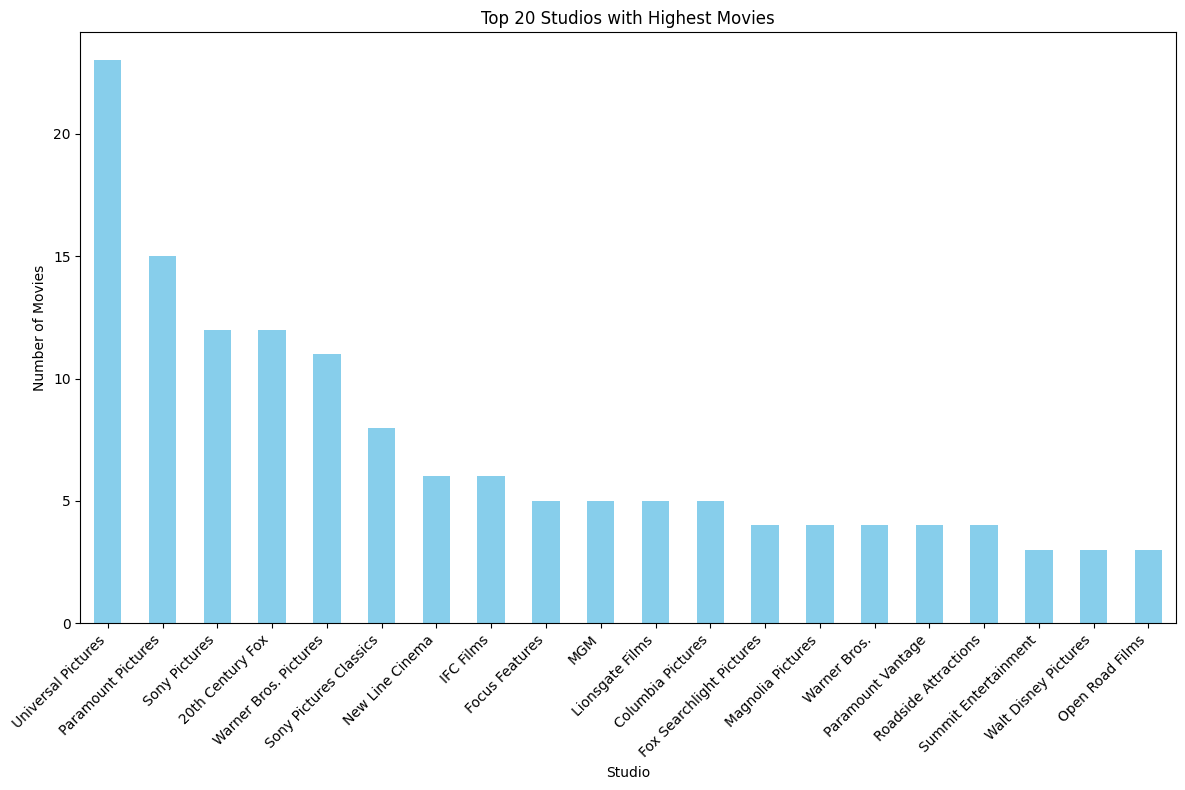

In [308]:
import matplotlib.pyplot as plt

# Select the top 20 studios
top_studios = studio_counts.head(20)

# Plot the bar chart
plt.figure(figsize=(12, 8))
top_studios.plot(kind='bar', color='skyblue')
plt.title('Top 20 Studios with Highest Movies')
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 2.  Genres Visualization

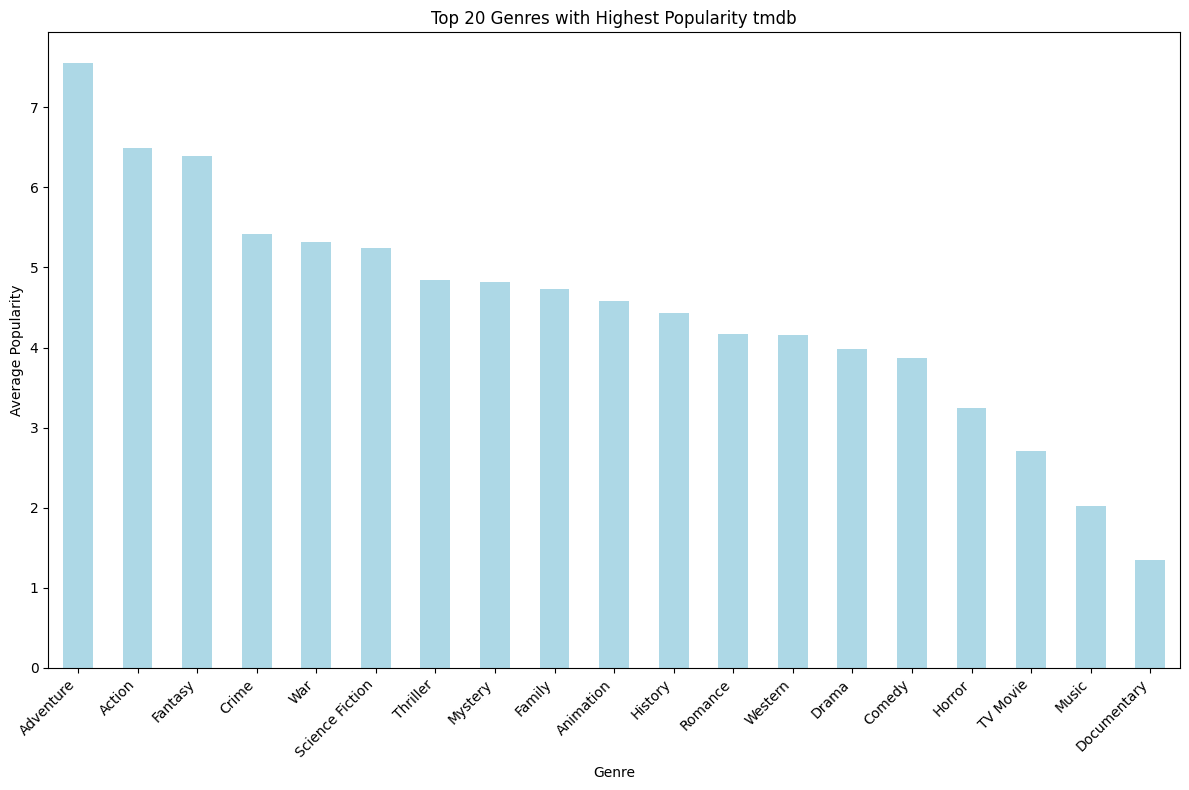

In [309]:

top_genres = tmdb_movies_exploded.groupby('genre_names')['popularity'].mean().sort_values(ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(12, 8))
top_genres.plot(kind='bar', color='lightblue')
plt.title('Top 20 Genres with Highest Popularity tmdb')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

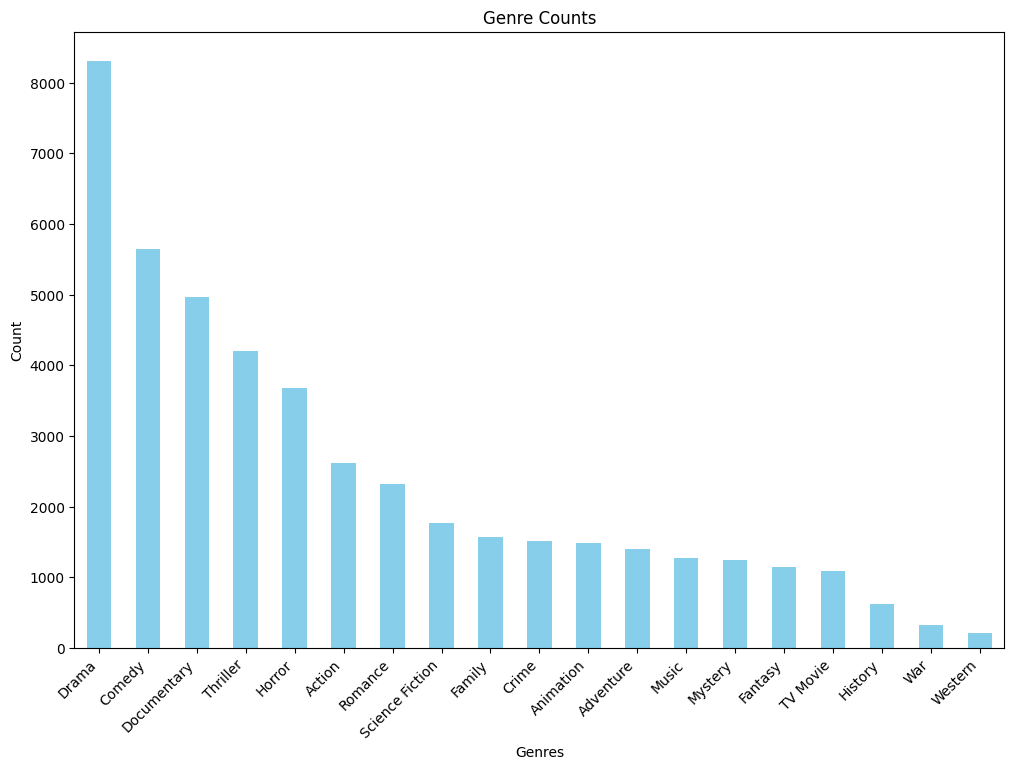

In [310]:

genre_counts.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Genre Counts')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

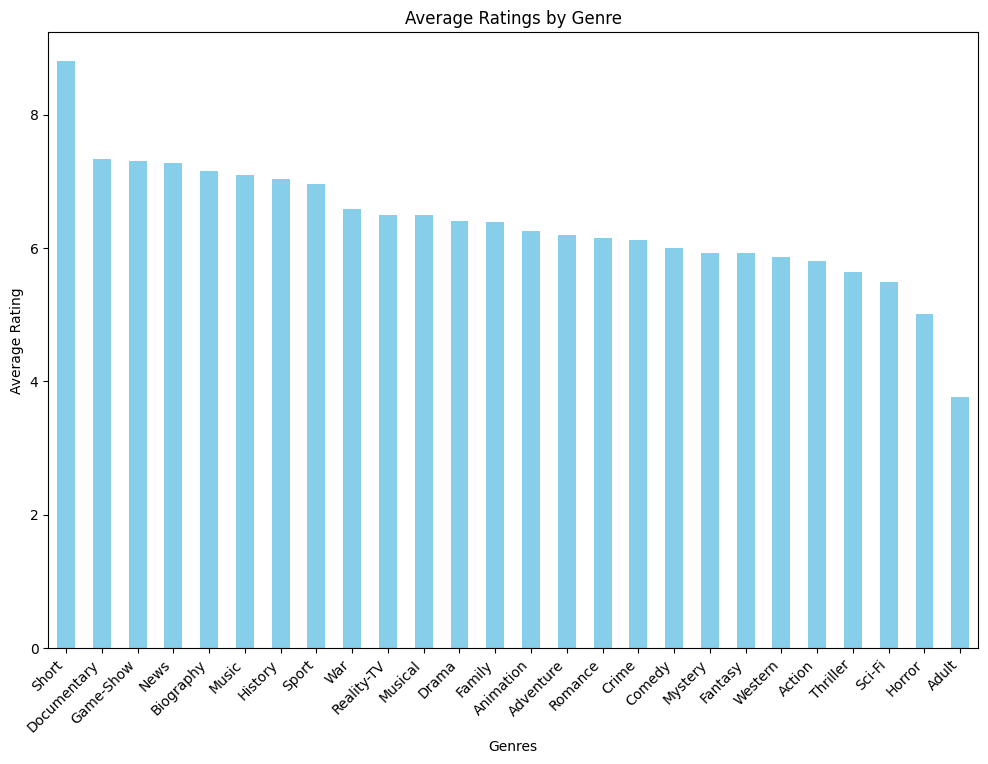

In [311]:

genre_avg_ratings.sort_values(ascending=False, inplace=True)  # Sort by average rating

# Create a bar plot
plt.figure(figsize=(12, 8))
genre_avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## 3. Directors Visualization

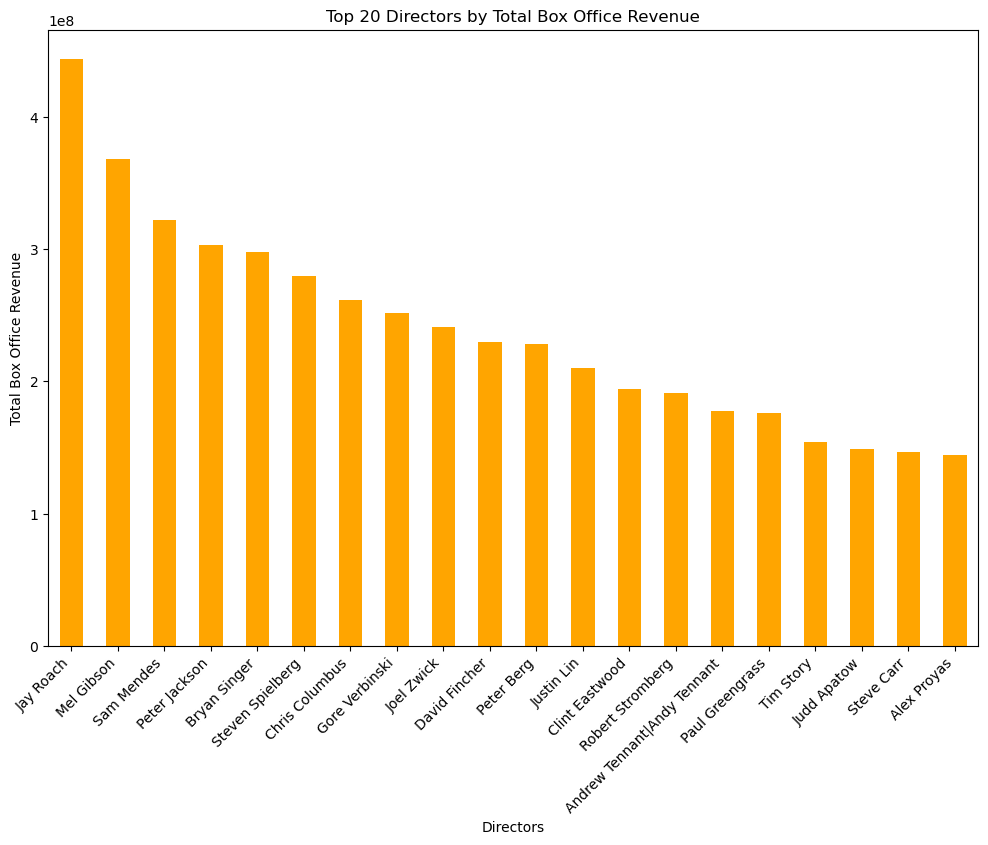

In [41]:
# Assuming 'sorted_directors' is the Series containing the total box office revenue for each director
top_20_directors = sorted_directors.head(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_20_directors.plot(kind='bar', color='orange')
plt.title('Top 20 Directors by Total Box Office Revenue')
plt.xlabel('Directors')
plt.ylabel('Total Box Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## 4. Writers Visualization

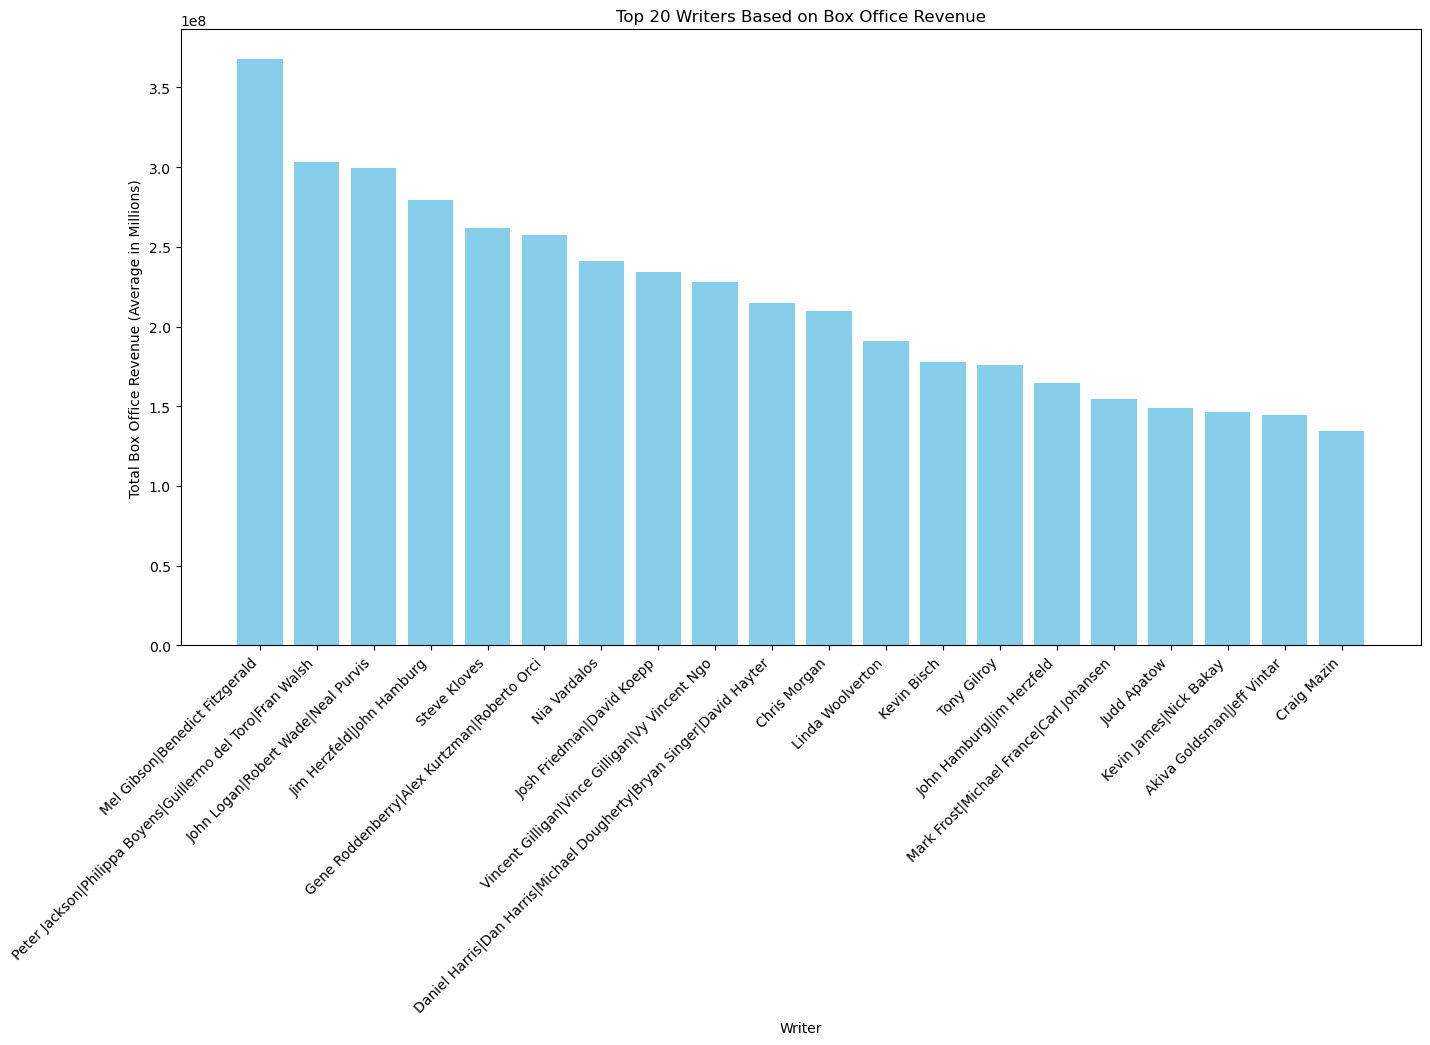

In [42]:
# Plot the data for the top 20 writers
plt.figure(figsize=(16, 8))
plt.bar(rt_movie_info_sorted['writer'].head(20), rt_movie_info_sorted['box_office'].head(20), color='skyblue')
plt.title('Top 20 Writers Based on Box Office Revenue')
plt.xlabel('Writer')
plt.ylabel('Total Box Office Revenue (Average in Millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## Evaluation of Microsoft Studios' Entry into Original Video Content

# Studios:

The analysis suggests that building upon an existing studio's foundation may be more advantageous than starting fresh. By focusing on studios with a high film output and strong critical reception, Microsoft can leverage their expertise and resources. This approach aligns with the recommendation to partner with studios like IFC Films and Sony Pictures, as they possess the necessary distribution capabilities and experience that Microsoft may lack .

# Genres:

By analyzing average movie ratings across different genres, Microsoft can identify potential audience preferences. The data suggests that dramas, documentaries, and comedies are prevalent amongst highly rated content, indicating a potential focus for Microsoft's film production.

# Directors:

The lack of correlation between a director's worldwide gross and average movie rating is a valuable finding. It suggests that financial success and critical acclaim are not always intertwined, allowing for a broader selection of talented directors. Microsoft should target directors who excel in both areas to ensure both financial and critical success.

# Writers:

While writers generally offer a higher return on investment than actors and directors, ROI does not seem to correlate with other factors like genre or critical reception. This suggests that maximizing ROI through writer selection may not be a straightforward strategy. However, the data identifies Sebastien Lifshitz, Jamie Buckner, and Joe Camp as talented writers in the recommended genres of animation, documentary, and drama, respectively, making them potential candidates for collaboration.

# Conclusions:

Entering the saturated video content market presents significant challenges for Microsoft. However, the insights from data analysis offer a clear roadmap to success. By leveraging established studios, strategically selecting content genres, and collaborating with talented directors and writers, Microsoft Studios can overcome the initial hurdles and establish itself as a reputable force in the industry.

# Actionable Recommendations:

Partner with studios like IFC Films and Sony Pictures to gain distribution channels and expertise.
Focus on producing dramas, documentaries, and comedies, as these genres tend to receive critical acclaim.
Collaborate with directors who have a proven track record of both financial and critical success.
Consider hiring writers like Sebastien Lifshitz, Jamie Buckner, and Joe Camp for projects in the animation, documentary, and drama genres, respectively.
